# Predicting Real Estate Prices in Bengaluru, India

<b>Source:</b> https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

## Dependencies/ Libraries Used

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib



Importing csv dataset into 

In [157]:
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.2.4
1.20.2
3.3.4
0.11.1


In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df1.shape

(13320, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Simplifying the Dimensionality

For simplication, we remove a set of features we feel are not significant factors to decide the real estate prices.

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.apply(pd.Series.nunique)

location      1305
size            31
total_sqft    2117
bath            19
price         1994
dtype: int64

### size

31 unique size rows

In [8]:
print(df1['size'].unique())


['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


## Data Cleaning

* The rows with null values cannot contribute to the machine learning model, as there is a high dispersion in the price. So dropping the rows would make sense in this case instead of filling them with mean of median values.
* The text data in the rows cannot be analysed so we need to remove the words like BHK and Bedroom

#### Removing the null values

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Removing the text from size column

In [11]:
df4 = df3
df4['size'] = df4['size'].apply(lambda x: int(x.split(' ')[0]))
df4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [12]:
df4[df4['size']>15]

,location,size,total_sqft,bath,price
1718,2Electronic City Phase II,27,8000,27.0,230.0
3379,1Hanuman Nagar,19,2000,16.0,490.0
3609,Koramangala Industrial Layout,16,10000,16.0,550.0
4684,Munnekollal,43,2400,40.0,660.0
11559,1Kasavanhalli,18,1200,18.0,200.0


In [13]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Converting range data to mean

In [14]:
# return values that are not of float type
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


It seems that the sqft column has range values of type `1133 - 1384`. So we will be replacing them with an average of such ranges.
`Sq.Meter`, `sq.ft` `4125Perch` are all removed.

a = (1133 + 1384)/2

In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/ 2
    try:
        return float(x)
    except:
        return None

df5 = df4.copy()
df5.total_sqft = df5.total_sqft.apply(convert_sqft_to_num)
df5 = df5[df5.total_sqft.notnull()]
df5.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [16]:
# rename size to BHK(bedroom, hall, kitchen)

In [17]:
df5.rename(columns = {'size':'bhk'}, inplace = True)
df5.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


#### Removing the outliers.

To make a realistic and more generalized machine learning model, we assume that each bedroom or bhk requires the estate to have atleast 300 sqft assigned to it at the very least. Real estates claiming otherwise are false data. To access this, we create a feature called `sqft_per_bedroom`.

In [18]:
df5['sqft_per_bedroom'] = df5.total_sqft/df5.bhk
df5

,location,bhk,total_sqft,bath,price,sqft_per_bedroom
0,Electronic City Phase II,2,1056.0,2.0,39.07,528.00
1,Chikka Tirupathi,4,2600.0,5.0,120.00,650.00
2,Uttarahalli,3,1440.0,2.0,62.00,480.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00,507.00
4,Kothanur,2,1200.0,2.0,51.00,600.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,690.60
13316,Richards Town,4,3600.0,5.0,400.00,900.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,570.50
13318,Padmanabhanagar,4,4689.0,4.0,488.00,1172.25


In [19]:
# deleting the rows that have sqft_per_bedroom lesser than 300

df6 = df5[~(df5.sqft_per_bedroom < 300)]
df6.head()

,location,bhk,total_sqft,bath,price,sqft_per_bedroom
0,Electronic City Phase II,2,1056.0,2.0,39.07,528.0
1,Chikka Tirupathi,4,2600.0,5.0,120.00,650.0
2,Uttarahalli,3,1440.0,2.0,62.00,480.0
3,Lingadheeranahalli,3,1521.0,3.0,95.00,507.0
4,Kothanur,2,1200.0,2.0,51.00,600.0


In [20]:
df6.shape

(12456, 6)

In [21]:
# removing the column as it has no further use case.
df6.drop(['sqft_per_bedroom'], axis = 1, inplace = True)
df6.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00


#### Reduce number of locations

In [22]:
df6.apply(pd.Series.nunique)

location      1215
bhk             13
total_sqft    1934
bath            14
price         1944
dtype: int64

There are 241 unique locations and one among them is labelled `other`. Locations for which we have less than 10 data points, are all classified in `other` categories.

In [23]:
location_stats = df6['location'].value_counts(ascending=False)
location_stats

Whitefield                               531
Sarjapur  Road                           388
Electronic City                          293
Kanakpura Road                           262
Thanisandra                              231
                                        ... 
Gokaula Extension                          1
SBM Colony                                 1
Maruthi HBCS Layout                        1
Indranagar  100ft road defence colony      1
Zuzuvadi                                   1
Name: location, Length: 1215, dtype: int64

In [24]:
less_than_10 = location_stats[location_stats<=10]
less_than_10

Nagappa Reddy Layout                     10
1st Block Jayanagar                      10
Basapura                                 10
Tindlu                                   10
1st Block Koramangala                    10
                                         ..
Gokaula Extension                         1
SBM Colony                                1
Maruthi HBCS Layout                       1
Indranagar  100ft road defence colony     1
Zuzuvadi                                  1
Name: location, Length: 993, dtype: int64

In [25]:
df6.location = df6.location.apply(lambda x: 'other' if x in less_than_10 else x)
len(df6.location.unique())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


223

#### Outlier Removal Using Standard Deviation and Mean

In [26]:
df6.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [27]:
df6['price_per_sqft'] = (df6.price) * 100000/df6.total_sqft
df6.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bhk,total_sqft,bath,price,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,2.649004,1590.189927,2.562781,111.187960,6308.502826
std,0.976046,1260.404795,1.080275,152.203367,4168.127339
min,1.000000,300.000000,1.000000,9.000000,267.829813
25%,2.000000,1115.000000,2.000000,49.000000,4210.526316
50%,3.000000,1300.000000,2.000000,70.000000,5294.117647
75%,3.000000,1700.000000,3.000000,115.000000,6916.666667
max,16.000000,52272.000000,16.000000,3600.000000,176470.588235


High dispersion is present in the data. The price/sqft is varying from 267 to 176470. For simplicity, we reduce the dimensionality so as to make a model that predicts average price of a real estate in a given area.

In [28]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_outliers(df6)
df7.shape, df6.shape

((10272, 6), (12456, 6))

In [29]:
df7.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


### Pearson Co-relation

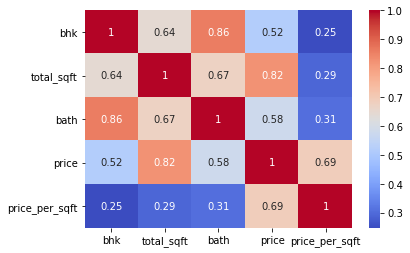

In [30]:
sns.heatmap(df7.corr(method='pearson'), annot=True, cmap='coolwarm');

* Function that takes `location` and `bhk` as input and plots a scatterplot between Price and total sqft area

In [31]:
######### test script #######
df8 = df7[(df7.location == 'Rajaji Nagar') & (df7.bhk == 2)]
df8.head()
######### test script #######

,location,bhk,total_sqft,bath,price,price_per_sqft
5656,Rajaji Nagar,2,1370.0,2.0,170.0,12408.759124
5659,Rajaji Nagar,2,1718.0,3.0,288.0,16763.678696
5662,Rajaji Nagar,2,1200.0,2.0,150.0,12500.000000
5663,Rajaji Nagar,2,1160.0,1.0,163.0,14051.724138
5665,Rajaji Nagar,2,1440.0,2.0,170.0,11805.555556


In [48]:
# custom function to plot scatter plot
def plot_scatter(df, input_bhk, input_location, input_color, width, height):
    filtered_results = df[(df.bhk == input_bhk) & (df.location == input_location)]
    matplotlib.rcParams['figure.figsize'] = (width, height)
    plt.scatter(filtered_results.total_sqft, filtered_results.price, color = input_color, label = (f'{input_location}, {input_bhk} BHK'), s=30)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.legend()


Plotting 2 BHK and 3 BHK prices for hebbal and rajaji nagar

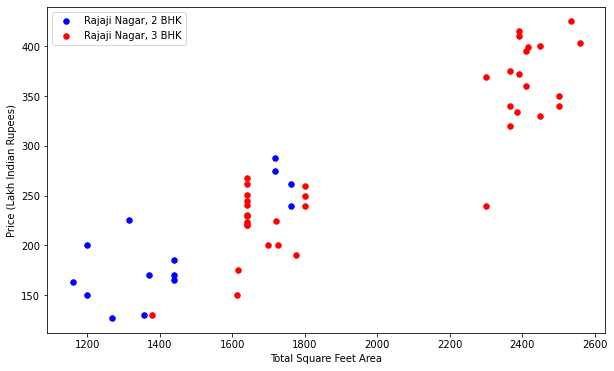

In [49]:
plot_scatter(df7, 2, "Rajaji Nagar", 'blue', 10, 6)
plot_scatter(df7, 3, "Rajaji Nagar", 'red', 10, 6)

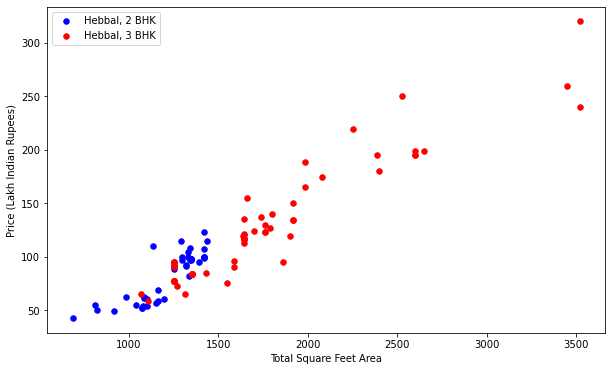

In [50]:
plot_scatter(df7, 2, "Hebbal", 'blue', 10, 6)
plot_scatter(df7, 3, "Hebbal", 'red', 10, 6)

Price of 3 BHK apartment is less than 2 bedroom apartment (with same square ft area). We need to remove such outliers for all the apartments.
In order to do so, we will build a dictionary of stats per bhk, i.e.
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [65]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)

In [66]:
a = df7.shape[0] - df8.shape[0]
print(f'Number of outliers removed by this = {a}')

Number of outliers removed by this = 2992


**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

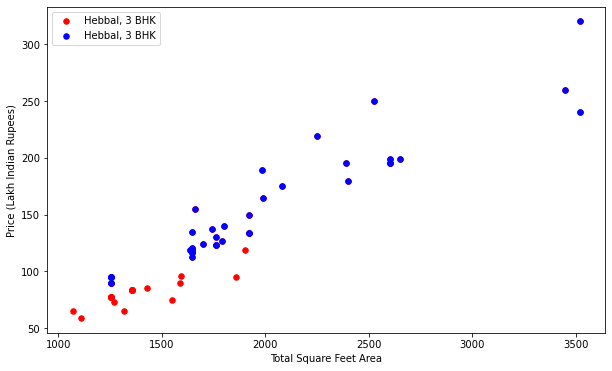

In [67]:
plot_scatter(df7, 3, "Hebbal", 'red', 10, 6)
plot_scatter(df8, 3, "Hebbal", 'blue', 10, 6)

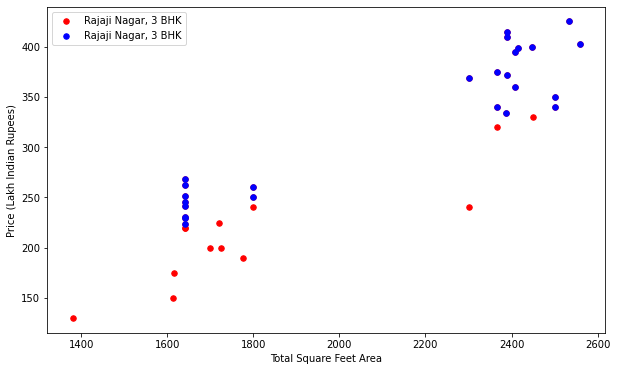

In [78]:
plot_scatter(df7, 3, "Rajaji Nagar", 'red', 10, 6)
plot_scatter(df8, 3, "Rajaji Nagar", 'blue', 10, 6)

In [123]:
df9 = df8.drop(['bhk','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price
1,Devarachikkanahalli,1250.0,2.0,40.0
2,Devarachikkanahalli,1200.0,2.0,83.0
3,Devarachikkanahalli,1170.0,2.0,40.0
4,Devarachikkanahalli,1425.0,2.0,65.0
5,Devarachikkanahalli,947.0,2.0,43.0


### One Hot Encoding For Location

In [124]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creating Model

In [127]:
df11.shape

(7280, 225)

In [128]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
y = df11.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [132]:
# test and training data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

# Using linear regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8307136524334088

### K Fold cross validation to measure accuracy of our LinearRegression model

In [133]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83025678, 0.86289902, 0.87222624, 0.807259  , 0.79352236])

### Grid Search CV to check other models

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [135]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# function to use linear regression, lasso and decision tree on the dataset and evaluate their scores

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.833233,{'normalize': False}
1,lasso,0.705840,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.719782,"{'criterion': 'mse', 'splitter': 'random'}"


### Best Model

Linear Regression has the best score.

## Testing the model

In [136]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [146]:
predict_price('Indira Nagar', 1000, 2, 2)

86.73574592870523

In [147]:
predict_price('Indira Nagar', 1000, 3, 3)

41.71537169625647

### Exporting the Machine learning model

In [143]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file

In [145]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

NameError: name 'pandas' is not defined